In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from config_matplotlib import configurer_style_matplotlib
configurer_style_matplotlib()

In [4]:
def initialisation(n0, n1, n2):
    
    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))
    
    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    return parametres

In [5]:
def forward_propagation(X, parametres):
    
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    
    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    
    activations = {
        'A1': A1,
        'A2': A2
    }
    
    return activations 

In [6]:
def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

In [7]:
def update(gradients, parametres, learning_rate):
    
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2 
    
    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    return parametres

In [69]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    return A2 >= 0.5

In [70]:
def plot_decision_boundary(X, y, parameters):
    h = 0.01  # step size in the mesh

    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    input_data = np.c_[xx.ravel(), yy.ravel()].T
    predictions = predict(input_data, parameters)
    predictions = predictions.reshape(xx.shape)

    plt.contourf(xx, yy, predictions, cmap=plt.cm.summer, alpha=0.8)

In [71]:
from tqdm import tqdm 
from sklearn.metrics import accuracy_score, log_loss

def neural_network(X, y, n1, learning_rate=0.1, n_iter=1000):
    
    # initialisation parametres
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']

        current_loss = log_loss(y.flatten(), A2.flatten())
        train_loss.append(current_loss)
        y_pred = predict(X, parametres)
        current_accuracy = accuracy_score(y.flatten(), y_pred.flatten())
        train_acc.append(current_accuracy)

        history.append([parametres.copy(), train_loss, train_acc, i])

        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)


    plt.figure(figsize=(11, 3))
    
    plt.subplot(1, 3, 1)
    plt.plot(train_loss, label="train loss") # Plot log_loss 
    plt.legend()
    plt.title("Training Loss")
    
    plt.subplot(1, 3, 2)
    plt.plot(train_acc, label="train accuracy") # Plot accuracy_score
    plt.legend()
    plt.title("Training Accuracy")
    
    plt.subplot(1, 3, 3)
    plt.scatter(X[0, :], X[1, :], c=y, cmap='summer') # Plot dataset
    plot_decision_boundary(X, y, parametres) # Plot frontière de décision 
    plt.title(f'Iteration {i}, Loss: {current_loss:.4f}, Accuracy: {current_accuracy:.2%}')
    
    plt.show()

    return parametres

dimensions de X: (2, 100)
dimensions de y: (1, 100)


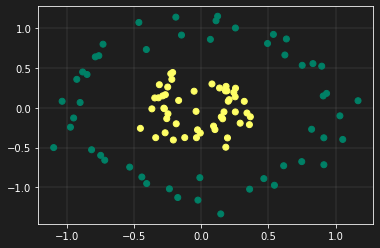

In [72]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 1000/1000 [00:01<00:00, 502.61it/s]


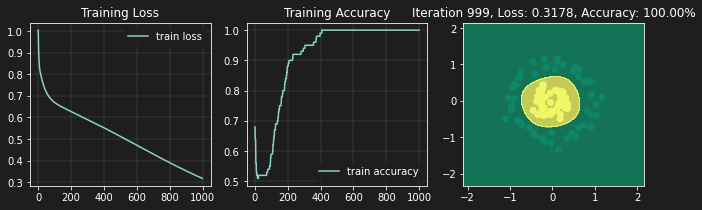

In [73]:
parametres = neural_network(X, y, n1=32, n_iter=1000, learning_rate=0.1)

## Small Project 1 
### Cat and Dog Image Recognition with a Two-Layer Neural Network Built from Scratch

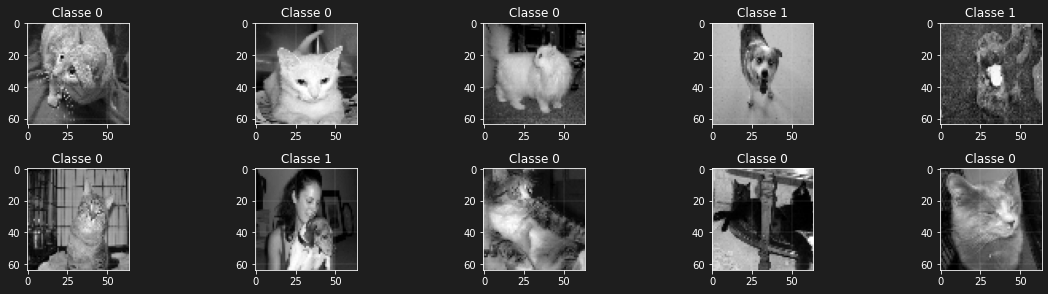

In [74]:
from utilities import *

X_train, y_train, X_test, y_test = load_data()

# (classe 0 : chat) & (classe 1 : chien)

plt.figure(figsize=(16, 8))
for i in range(1, 11):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Classe {int(y_train[i])}")
    plt.tight_layout()
plt.show()


In [75]:
y_train = y_train.T
y_test = y_test.T

X_train = X_train.T
X_train_reshape = X_train.reshape(-1, X_train.shape[-1]) / X_train.max()

X_test = X_test.T
X_test_reshape = X_test.reshape(-1, X_test.shape[-1]) / X_test.max()

m_train = 300
m_test = 80
X_train_reshape = X_train_reshape[:, :m_train]
X_test_reshape = X_test_reshape[:, :m_test]
y_train = y_train[:, :m_train]
y_test = y_test[:, :m_test]

print("X_train_reshape:", X_train_reshape.shape)
print("X_test_reshape:", X_test_reshape.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train_reshape: (4096, 300)
X_test_reshape: (4096, 80)
y_train: (1, 300)
y_test: (1, 80)


In [76]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score, log_loss

def neural_network2(
        X_train_reshape, y_train, X_test_reshape, y_test, n1, learning_rate=0.1, n_iter=1000):
    
    # Initialization of parameters
    n0 = X_train_reshape.shape[0]
    n2 = y_train.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    
    test_loss = []
    test_acc = [] 

    # Gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train_reshape, parametres)
        A2 = activations['A2']

        # Train 
        current_loss = log_loss(y_train.flatten(), A2.flatten())
        train_loss.append(current_loss)
        y_pred_train = predict(X_train_reshape, parametres)
        current_accuracy_train = accuracy_score(y_train.flatten(), y_pred_train.flatten())
        train_acc.append(current_accuracy_train)
        
        # Test 
        activations_test = forward_propagation(X_test_reshape, parametres)
        A2_test = activations_test['A2']
        current_loss_test = log_loss(y_test.flatten(), A2_test.flatten())
        test_loss.append(current_loss_test)
        y_pred_test = predict(X_test_reshape, parametres)
        current_accuracy_test = accuracy_score(y_test.flatten(), y_pred_test.flatten())
        test_acc.append(current_accuracy_test)
       
        # Update parameters
        gradients = back_propagation(X_train_reshape, y_train, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)


    # Plotting
    plt.figure(figsize=(12, 4))
    
    # Plot training loss and test loss
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label="train loss") 
    plt.plot(test_loss, label="test loss") 
    plt.legend()
    plt.title("Training and Test Loss")
    
    # Plot training accuracy and test accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label="train accuracy") 
    plt.plot(test_acc, label="test accuracy") 
    plt.legend()
    plt.title("Training and Test Accuracy")
    
    plt.show()
    return (parametres, A2, y)


100%|██████████| 1500/1500 [00:47<00:00, 31.63it/s]


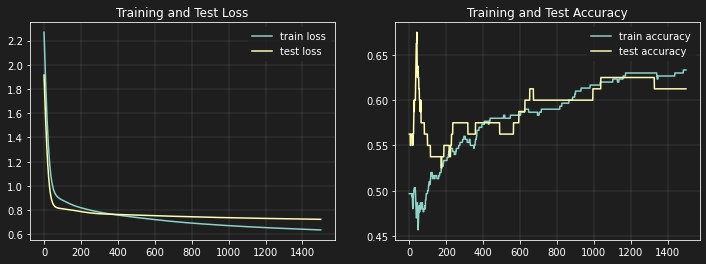

In [77]:
# Instance du modèle à 2 couches 
parametres = neural_network2(
    X_train_reshape, y_train, X_test_reshape, y_test, n1=32, learning_rate=0.01, n_iter=1500)

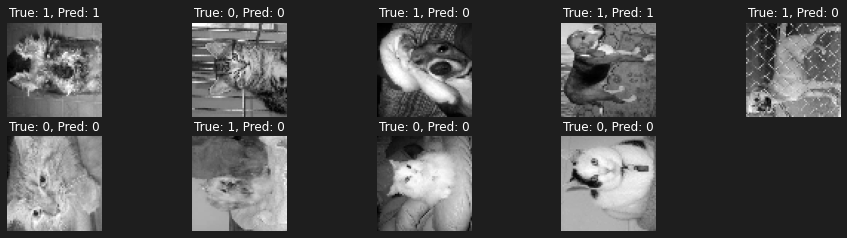

In [266]:
# Select 10 random indices from the test set
random_indices = np.random.choice(X_test_reshape.shape[1], size=10, replace=False)

# Extract the corresponding images and labels
selected_images = X_test_reshape[:, random_indices]
selected_labels = y_test[:, random_indices]

# Make predictions
predictions = predict(selected_images, parametres)

plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(selected_images[:, i].reshape(64, 64), cmap='gray')  # for grayscale images
    plt.title(f"True: {int(selected_labels[0, i])}, Pred: {int(predictions[0, i])}")
    plt.axis('off')

plt.show()

In [267]:
from sklearn.metrics import classification_report

# Assuming predictions is a NumPy array containing your model's predictions
predictions = predict(X_test_reshape, parametres)

# Flatten the predictions and true labels
y_pred_flat = predictions.flatten()
y_true_flat = y_test.flatten()

# Display the classification report
print(classification_report(y_true_flat, y_pred_flat))


              precision    recall  f1-score   support

         0.0       0.56      0.67      0.61        36
         1.0       0.68      0.57      0.62        44

    accuracy                           0.61        80
   macro avg       0.62      0.62      0.61        80
weighted avg       0.62      0.61      0.61        80

